In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [3]:
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [108]:
colors = ['pastel', 'deep', 'muted', 'colorblind', 'dark', 'bright']
all_colors = []
for i in range(6):
  c = []
  for color in colors:
    c.append(sns.color_palette(color)[i])
  all_colors.append(c)

In [187]:
darker = sns.cubehelix_palette(start=2, rot=0, dark=.3, light=.85)
lighter = sns.color_palette('YlGn')

### Distribution of subgenres in various genres

Text(-0.02, 0.5, 'Number of tracks')

<Figure size 1440x1440 with 0 Axes>

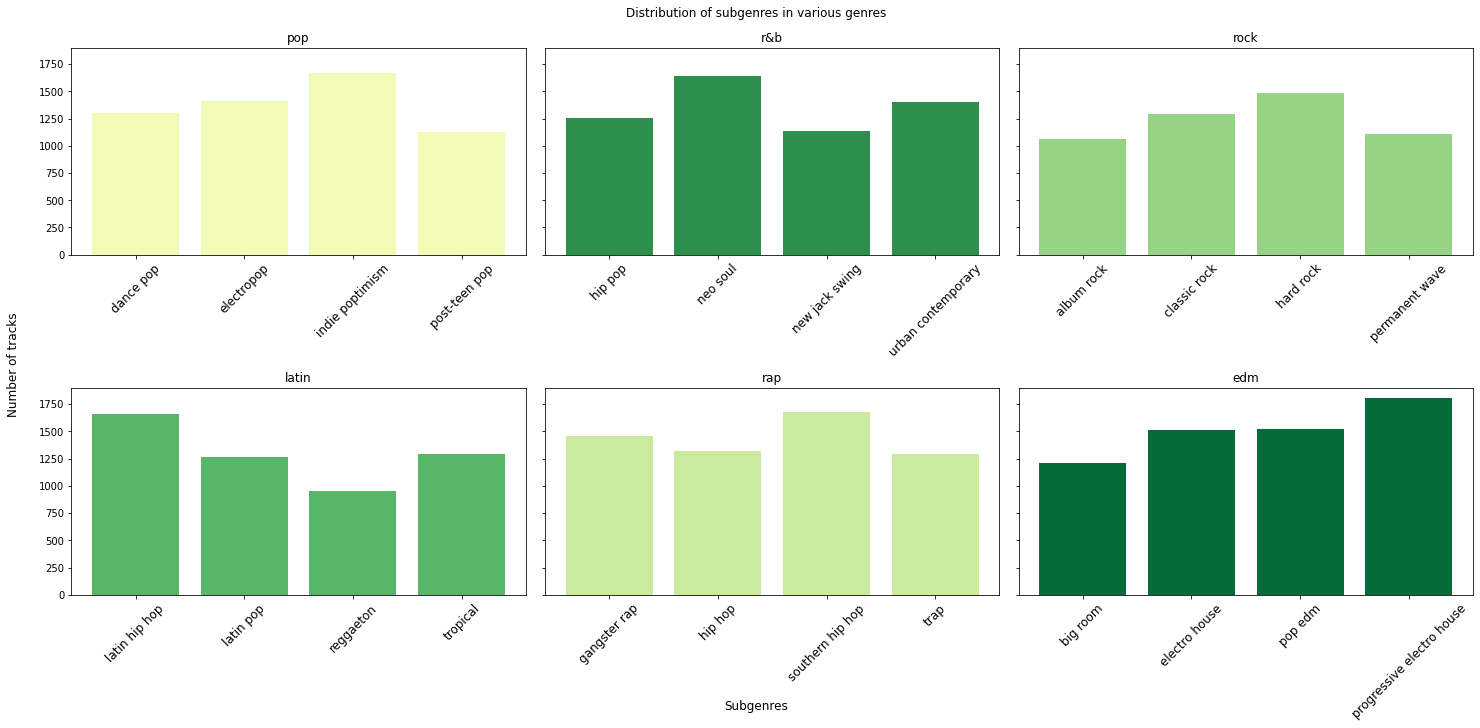

In [266]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(20,10), constrained_layout=True)
for i, genre in enumerate(spotify['playlist_genre'].unique()):
  genres = spotify[spotify['playlist_genre']==genre].groupby(['playlist_subgenre'])['loudness'].agg('count').reset_index()
  ax[i%2, i%3].bar(x=genres['playlist_subgenre'], height=genres['loudness'], color=lighter[i])
  ax[i%2, i%3].set_xticklabels(genres['playlist_subgenre'], rotation = 45, fontsize=12)
  ax[i%2, i%3].set_title(genre)
fig.suptitle('Distribution of subgenres in various genres', fontsize=12)
fig.text(0.5, 0.02, 'Subgenres', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Number of tracks', va='center', rotation='vertical', fontsize=12)

### Distribution of genres

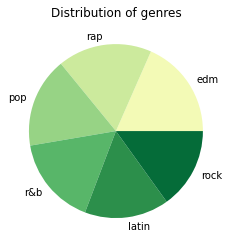

In [192]:
colors = sns.color_palette('flare', n_colors=6)
spotify['playlist_genre'].value_counts().plot.pie(colors=lighter,
                                                  title='Distribution of genres',
                                                  ylabel='')

### В какой месяц/день/год обычно выходят треки?

In [113]:
from datetime import date

In [114]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6:'Sunday'}
def weekday(x):
  x = list(map(int, x.split('-')))
  if len(x) == 3:
    d = date(x[0], x[1], x[2])
    return weekdays[d.weekday()]

In [115]:
spotify['release_weekday'] = spotify['track_album_release_date'].apply(weekday)

#### Number of tracks released within a week in differen genres

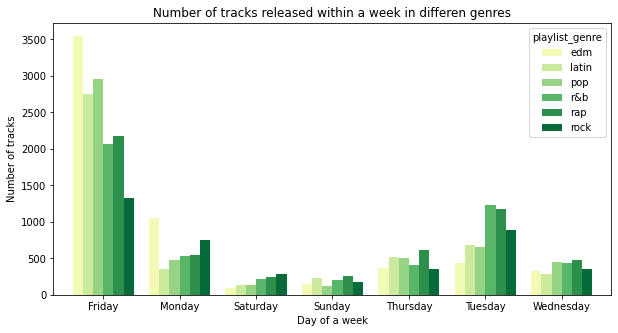

In [193]:
pd.pivot_table(data=spotify, 
               index='release_weekday', 
               columns='playlist_genre', 
               values='loudness', 
               aggfunc='count').\
               plot.bar(figsize=(10,5), width=0.8, color=lighter, rot=0,
                        title='Number of tracks released within a week in differen genres',
                        xlabel='Day of a week',
                        ylabel='Number of tracks')

#### Number of tracks released in different months

In [121]:
dates = spotify['track_album_release_date'].str.split('-',expand=True)
dates = dates.rename(columns = {0: 'year', 1: 'month', 2: 'day'})

In [122]:
dates = dates.dropna(axis=0, how='any')
dates['playlist_genre'] = spotify['playlist_genre'].copy()

In [123]:
dates['year'] = dates['year'].astype(int)
dates['month'] = dates['month'].astype(int)
dates['day'] = dates['day'].astype(int)
months = {1:'January', 2:'February', 3:'March', 
          4:'April', 5:'May', 6:'June', 7:'July', 
          8:'August', 9:'September', 10:'October', 
          11:'November', 12:'December'}
dates['month'] = dates['month'].map(months)

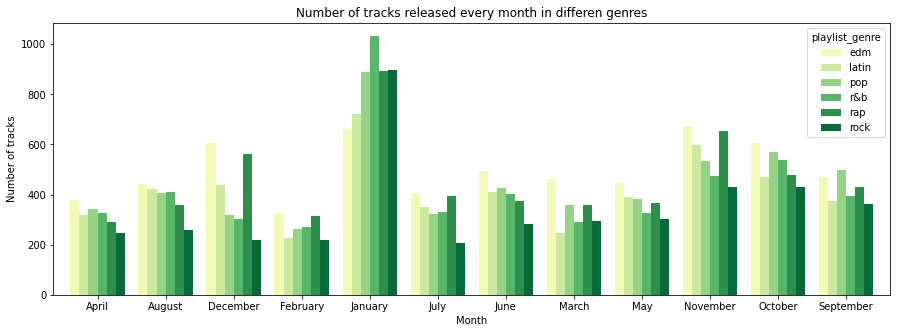

In [149]:
pd.pivot_table(data=dates, 
               index='month', 
               columns='playlist_genre', 
               values='day', 
               aggfunc='count').\
               plot.bar(figsize=(15,5), width=0.8, rot=0,
                        color=sns.color_palette('YlGn'),
                        title='Number of tracks released every month in differen genres',
                        xlabel='Month',
                        ylabel='Number of tracks')

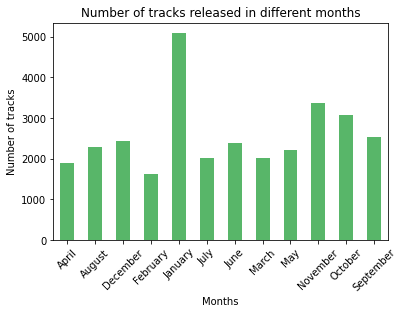

In [194]:
dates.groupby('month')['month'].agg('count').plot.bar(color=sns.color_palette('deep')[2],
                                                      rot=45,
                                                      title='Number of tracks released in different months',
                                                      xlabel='Months',
                                                      ylabel='Number of tracks')

#### Number of tracks released between 2010 and 2020 in different genres

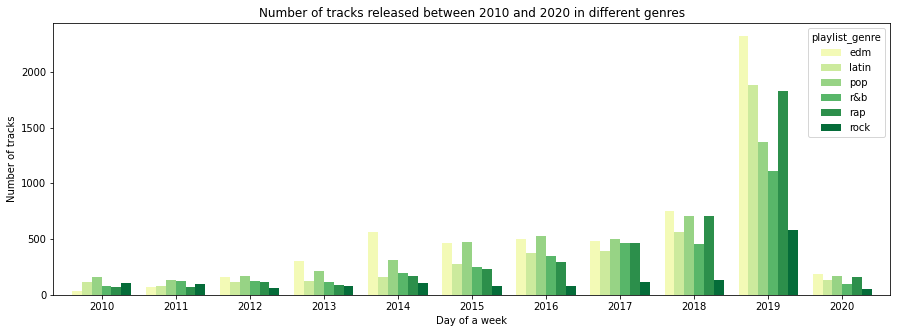

In [195]:
pd.pivot_table(data=dates[dates['year']>=2010], 
               index='year', 
               columns='playlist_genre', 
               values='day', 
               aggfunc='count').\
               plot.bar(figsize=(15,5), width=0.8, rot=0,
                        color=lighter,
                        title='Number of tracks released between 2010 and 2020 in different genres',
                        xlabel='Day of a week',
                        ylabel='Number of tracks')

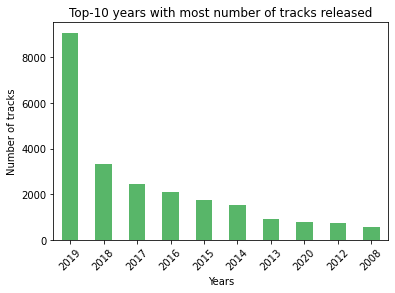

In [196]:
dates.groupby('year')['year'].agg('count').\
  sort_values(ascending=False)[:10].\
  plot.bar(color=lighter[3], rot=45,
           title='Top-10 years with most number of tracks released',
           xlabel='Years', ylabel='Number of tracks')

#### Number of tracks released in different days of a month

In [288]:
pd.pivot_table(data=dates, 
               index='day', 
               columns='playlist_genre', 
               values='month', 
               aggfunc='count').sort_values(by='edm', ascending=False)[:10]

playlist_genre,edm,latin,pop,r&b,rap,rock
day,,,,,,
1,412,599,651,869,727,927
13,258,165,162,161,236,116
6,248,161,180,159,194,91
27,240,125,173,176,186,114
22,229,151,162,124,184,99
15,228,158,165,179,180,106
10,224,198,181,136,194,146
17,217,156,176,138,184,102
8,215,138,144,141,166,157


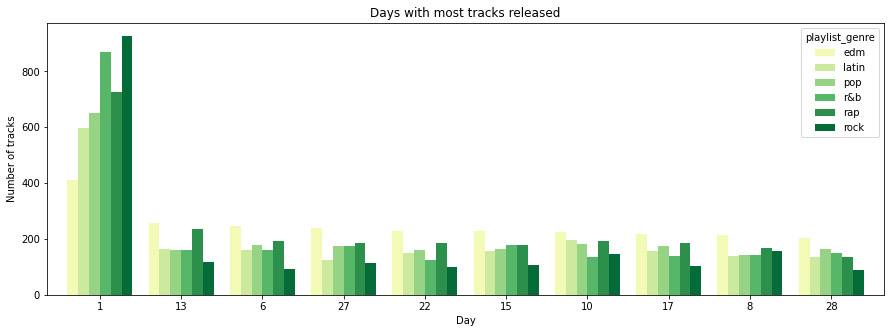

In [291]:
pd.pivot_table(data=dates, 
               index='day', 
               columns='playlist_genre', 
               values='month', 
               aggfunc='count').sort_values(by='edm', ascending=False)[:10].\
               plot.bar(figsize=(15,5), width=0.8, rot=0,
                        color=sns.color_palette('YlGn'),
                        title='Days with most tracks released',
                        xlabel='Day',
                        ylabel='Number of tracks')

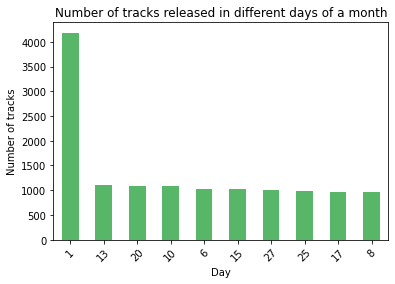

In [197]:
dates.groupby('day')['day'].agg('count').\
  sort_values(ascending=False)[:10].\
  plot.bar(color=lighter[3], rot=45,
           title='Number of tracks released in different days of a month',
           xlabel='Day', ylabel='Number of tracks')

### Top-10 of singers who have released the most songs

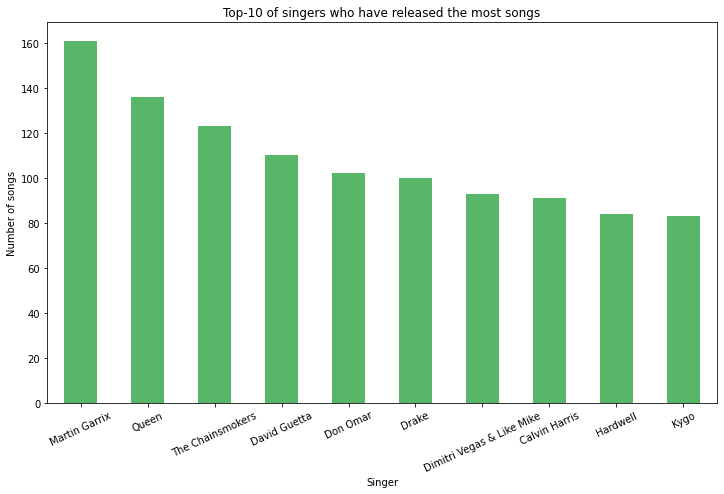

In [199]:
spotify.groupby('track_artist')['track_artist'].agg('count').\
  sort_values(ascending=False)[:10].\
  plot.bar(color=lighter[3], rot=25, figsize=(12, 7),
           title='Top-10 of singers who have released the most songs',
           xlabel='Singer', ylabel='Number of songs')

### Map of correlation between discreet characteristics of a song

Text(0.5, 1.0, 'Correlation between song features')

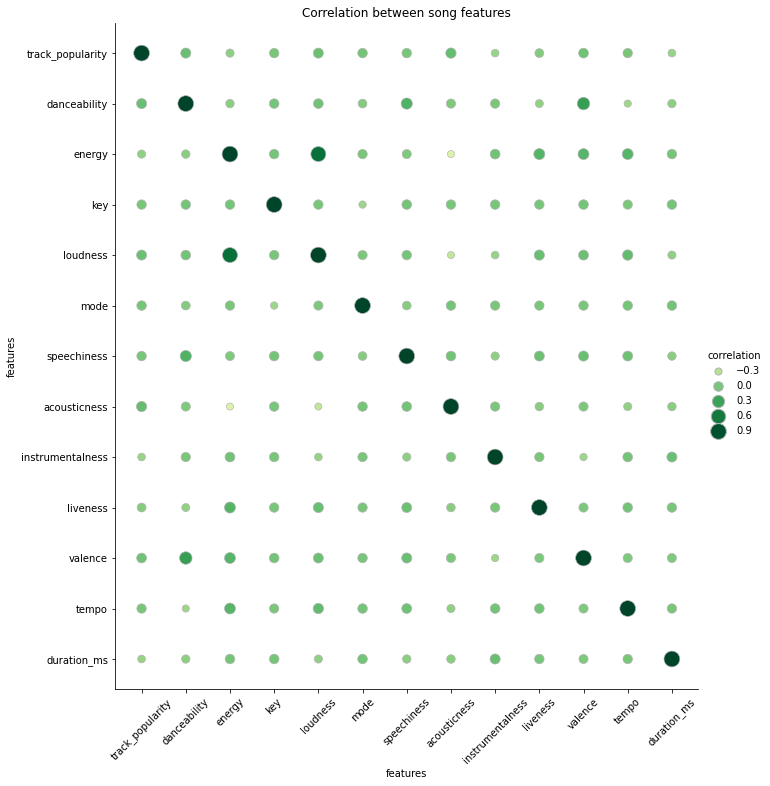

In [292]:
spotify_corr = spotify.corr(method='pearson').stack().reset_index(name="correlation")
g = sns.relplot(data=spotify_corr, x="level_0", y="level_1", 
            hue="correlation", size="correlation", palette='YlGn', 
            hue_norm=(-1, 1), edgecolor=".7",
            height=10, sizes=(50, 250), size_norm=(-.2, .8))
for label in g.ax.get_xticklabels():
    label.set_rotation(45)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.xlabel('features')
plt.ylabel('features')
plt.title('Correlation between song features')

In [214]:
lighter[0]

(0.9534025374855825, 0.9821453287197233, 0.7143252595155709)

Text(0.5, 1.0, 'Relation between energy and loudness of a song')

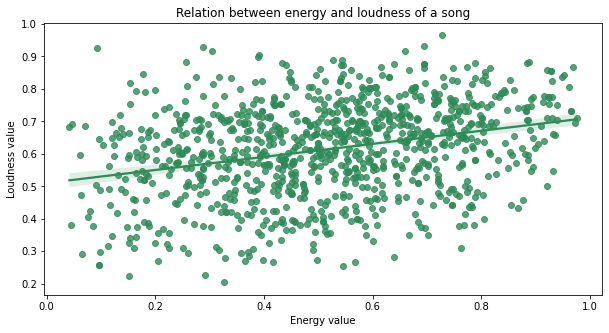

In [293]:
plt.figure(figsize=(10, 5))
sns.regplot(x=spotify['valence'][1000:2000], y=spotify['danceability'][1000:2000], color='seagreen')
plt.xlabel('Energy value')
plt.ylabel('Loudness value')
plt.title('Relation between energy and loudness of a song')

Text(0.5, 1.0, 'Relation between energy and loudness of a song')

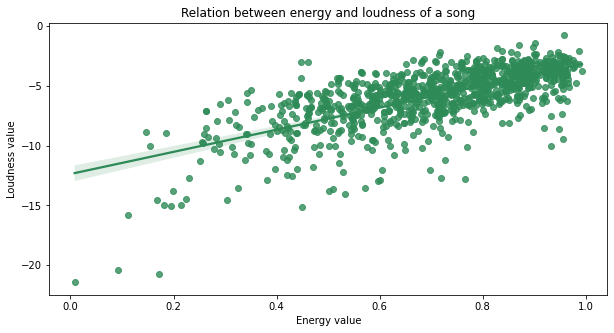

In [230]:
plt.figure(figsize=(10, 5))
sns.regplot(x=spotify['energy'][1000:2000], y=spotify['loudness'][1000:2000], color='seagreen')
plt.xlabel('Energy value')
plt.ylabel('Loudness value')
plt.title('Relation between energy and loudness of a song')

### Distribution of different descreet characteristics of songs in different genres


In [243]:
spotify['loudness']

0       -2.634
1       -4.969
2       -3.432
3       -3.778
4       -4.672
         ...  
32828   -1.814
32829   -4.462
32830   -4.899
32831   -3.361
32832   -4.571
Name: loudness, Length: 32833, dtype: float64

Text(-0.02, 0.5, 'Value')

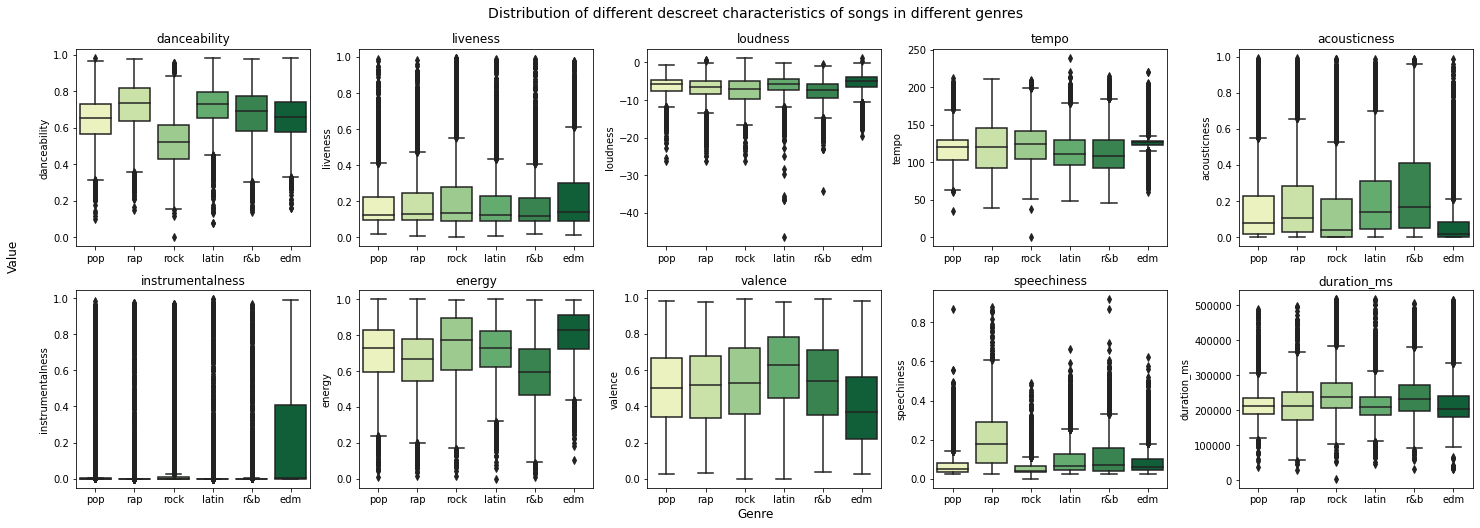

In [280]:
characteristics = ['danceability', 'energy', 
                   'loudness', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness', 
                   'valence', 'tempo','duration_ms']
fig, ax = plt.subplots(2, 5, figsize=(20, 7), constrained_layout=True)
for i, ch in enumerate(characteristics):
  sns.boxplot(ax=ax[i%2, i%5], 
              data=spotify, x='playlist_genre', y=ch,
              palette='YlGn')
  ax[i%2, i%5].set_title(ch)
  ax[i%2, i%5].set_xlabel('')
  ax[i%2, i%5].set_xticklabels(labels=spotify['playlist_genre'].unique())
fig.suptitle('Distribution of different descreet characteristics of songs in different genres', fontsize=14)
fig.text(0.5, -0.02, 'Genre', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Value', va='center', rotation='vertical', fontsize=12)